# Funções, bibliotecas e Dataframe ficticios

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.font_manager as fm #para alterar as fontes dos graficos
import seaborn as sns

import pyperclip

# Definindo o estilo de fonte e tema
fonte = fm.FontProperties(family="Calibri", style="italic")

sns.set_style('whitegrid') #cor da grade(fundo)

In [2]:
import pandas as pd
import numpy as np

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
import traceback

In [4]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
#response = requests.get(url); code = response.text; exec(code)
#df = fake_database2(2250); df_bck = df.copy(); display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/fake_database.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py
TUDO OK


In [5]:
def contribuicao_proba_tabela(df, coluna_analisada, model, sep=10):
    # Criar DataFrame para análise com a variável de interesse variando em um intervalo
    minimo, maximo = df[coluna_analisada].min(), df[coluna_analisada].max()
    df_analise_feature = pd.DataFrame()

    # Preencher as demais colunas com o valor médio
    for coluna in df.columns:
        if coluna != coluna_analisada:
            df_analise_feature[coluna] = df[coluna].mean()
        else:
            df_analise_feature[coluna] = np.linspace(minimo, maximo, sep)

    # Fazer previsão de probabilidade e adicionar ao DataFrame de análise
    df_analise_feature['predict_proba'] = model.predict_proba(df_analise_feature)[:, 1]

    # Retornar apenas a coluna analisada e a probabilidade prevista
    return df_analise_feature[[coluna_analisada, 'predict_proba']]

#x_data = pd.DataFrame(x_teste, columns=df.columns[:-1])
#resultado = contribuicao_proba_tabela(x_data, 'feature_4', modelo_m1, sep=10)
#resultado

def contribuicao_proba_grafico(resultado, coluna):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(resultado['predict_proba'].min(), resultado['predict_proba'].max())
    colors = cmap(norm(resultado['predict_proba']))

    ax = sns.lineplot(x=resultado[coluna].round(1), y=resultado['predict_proba'])

#plt.figure(figsize=(4,3))
#contribuicao_proba_grafico(resultado, 'feature_4')
#plt.show()

def contribuicao_proba(x_data, modelo, sep=10):
    for i, coluna_analisada in enumerate(x_data.columns, 1):
        plt.subplot(10, 3, i)
        resultado = contribuicao_proba_tabela(x_data, coluna_analisada, modelo, sep=sep)
        contribuicao_proba_grafico(resultado, coluna_analisada)


from sklearn.inspection import PartialDependenceDisplay
def contribuicao_proba2(x_data, modelo):
    # Definir o tamanho da figura geral
    fig, axes = plt.subplots(len(x_data.columns)//3+1, 3, figsize=(10, 10))
    axes = axes.ravel()  # Transformar a matriz de eixos em uma lista para fácil iteração

    # Iterar pelas colunas e gerar gráficos de dependência parcial
    for i, column in enumerate(x_data.columns):
        PartialDependenceDisplay.from_estimator(modelo, x_data, [column], ax=axes[i])

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

# Criando dataframe sintetico desbalanceado

In [6]:
from sklearn.datasets import make_classification
import pandas as pd

# Gerar dados sintéticos desbalanceados
x, y = make_classification(n_samples=7500, 
                           n_features=10, 
                           #n_informative=4,   # Aumentar o número de features informativas
                           n_redundant=4,
                           #n_classes=2, 
                           #n_clusters_per_class=5,  # Manter 5 clusters por classe
                           weights=[0.93, 0.07], 
                           class_sep=0.8,
                           random_state=3141592)

# Criar um DataFrame
df = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])
df['target'] = y

# Ver a distribuição de classes
print(df['target'].value_counts(normalize=True))
print(df['target'].value_counts())

display(pd.concat([df.head(5), df.tail(5)]).T)
# Salvar para análise
#df.to_csv('imbalanced_dataset.csv', index=False)


target
0    0.928133
1    0.071867
Name: proportion, dtype: float64
target
0    6961
1     539
Name: count, dtype: int64


,0,1,2,3,4,7495,7496,7497,7498,7499
feature_0,-0.354913,0.019583,-0.727693,-1.728494,-2.095209,-1.349061,-1.021448,-1.359013,-0.952335,-3.122318
feature_1,-0.300767,-1.346207,1.545124,1.149456,-1.343809,0.529758,-1.302616,-0.842432,1.620462,0.726353
feature_2,-0.613042,-0.257290,-0.440505,-2.174103,-3.045559,-1.676168,-1.401588,-1.198957,-0.724864,-3.641652
feature_3,-1.059870,0.484414,1.037156,-0.028019,0.719951,0.442741,0.549906,0.097200,-0.681701,-0.853576
feature_4,0.439016,0.810363,0.133350,-1.986144,1.228918,0.205944,0.410926,0.164281,0.849392,1.449813
feature_5,-0.219144,0.132332,-0.786537,-1.402463,-1.530580,-1.103141,-0.780535,-1.313491,-0.968064,-2.651347
feature_6,0.029307,0.217157,-0.553468,-0.467136,-0.257974,-0.380134,-0.188271,-0.750857,-0.612825,-1.058458
feature_7,-0.171275,0.257789,-1.047643,-1.526423,-1.500339,-1.208990,-0.802390,-1.635548,-1.244487,-3.000939
feature_8,1.351291,1.083757,-0.008559,1.144483,2.257122,0.865823,0.703855,-0.328063,-1.362664,-0.486289
feature_9,-0.563871,-0.645928,0.742648,-0.858806,-1.995008,-0.622184,-0.779168,0.511825,0.626843,-0.887105


# Tratando o DataFrame

In [7]:
# Variavel Dependente
var_dep = 'target'
y = df[var_dep]
display(y.head())

x = df.drop(var_dep, axis=1)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [8]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

# Remover prefixo 'remainder__' das colunas que não foram transformadas
#novos_nomes_colunas = [nome.replace('remainder__', '') for nome in novos_nomes_colunas]

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# Normalização (scaling entre 0 e 1) com MinMaxScaler ******************************
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
#x = normalizacao.fit_transform(x)
# df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

# Padronização (média 0 e desvio padrão 1) com StandardScaler **********************
from sklearn.preprocessing import StandardScaler
padronizacao = StandardScaler()
#x = padronizacao.fit_transform(x)
# df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

(5625, 10) (1875, 10)
(5625,) (1875,)


# Instanciando modelos

In [9]:
sem_random = 3141592

import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier,
                              BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import (LogisticRegression, PassiveAggressiveClassifier,
                                  RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron)
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Definir a semente aleatória
sem_random = 3141592

# Criar dicionário com todos os modelos
model_dict = {
    # Modelos de Base
    'DummyClassifier': DummyClassifier(),

    # Modelos Baseados em Árvores
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=sem_random),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=sem_random),
    'RandomForestClassifier': RandomForestClassifier(random_state=sem_random),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=sem_random),
    'BaggingClassifier': BaggingClassifier(random_state=sem_random),
    
    # Modelos de Boosting
    'AdaBoostClassifier': AdaBoostClassifier(random_state=sem_random),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=sem_random),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=sem_random),
    'XGBClassifier': XGBClassifier(random_state=sem_random),
    'LGBMClassifier': LGBMClassifier(random_state=sem_random),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),

    # Modelos Lineares
    'LogisticRegression': LogisticRegression(random_state=sem_random),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=sem_random),
    'RidgeClassifier': RidgeClassifier(random_state=sem_random),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SGDClassifier': SGDClassifier(random_state=sem_random),
    'Perceptron': Perceptron(random_state=sem_random),

    # Modelos Baseados em Instâncias
    'KNeighborsClassifier': KNeighborsClassifier(),
    'NearestCentroid': NearestCentroid(),

    # SVM e Modelos Baseados em Hiperplanos
    'SVC': SVC(random_state=sem_random, probability=True), # SVM 
    'LinearSVC': LinearSVC(random_state=sem_random),
    
    # Modelos Probabilísticos e Análise Discriminante
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),

    # Modelos Semi-Supervisionados
    'LabelSpreading': LabelSpreading(),
    'LabelPropagation': LabelPropagation(),

    # Outros Modelos
    'CalibratedClassifierCV': CalibratedClassifierCV(),

    # Modelos de Redes Neurais
    'MLPClassifier': MLPClassifier(random_state=sem_random),
}

#for model_name in model_dict:
#    print(model_name, '->', model_dict[model_name])

model_dict_smote = {
    # Modelos de Base
    'DummyClassifier': DummyClassifier(),

    # Modelos Baseados em Árvores
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=sem_random),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=sem_random),
    'RandomForestClassifier': RandomForestClassifier(random_state=sem_random),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=sem_random),
    'BaggingClassifier': BaggingClassifier(random_state=sem_random),
    
    # Modelos de Boosting
    'AdaBoostClassifier': AdaBoostClassifier(random_state=sem_random),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=sem_random),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=sem_random),
    'XGBClassifier': XGBClassifier(random_state=sem_random),
    'LGBMClassifier': LGBMClassifier(random_state=sem_random),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),

    # Modelos Lineares
    'LogisticRegression': LogisticRegression(random_state=sem_random),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=sem_random),
    'RidgeClassifier': RidgeClassifier(random_state=sem_random),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SGDClassifier': SGDClassifier(random_state=sem_random),
    'Perceptron': Perceptron(random_state=sem_random),

    # Modelos Baseados em Instâncias
    'KNeighborsClassifier': KNeighborsClassifier(),
    'NearestCentroid': NearestCentroid(),

    # SVM e Modelos Baseados em Hiperplanos
    'SVC': SVC(random_state=sem_random, probability=True), # SVM 
    'LinearSVC': LinearSVC(random_state=sem_random),
    
    # Modelos Probabilísticos e Análise Discriminante
    'GaussianNB': GaussianNB(), # Naive Bayes
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),

    # Modelos Semi-Supervisionados
    'LabelSpreading': LabelSpreading(),
    'LabelPropagation': LabelPropagation(),

    # Outros Modelos
    'CalibratedClassifierCV': CalibratedClassifierCV(),

    # Modelos de Redes Neurais
    'MLPClassifier': MLPClassifier(random_state=sem_random),
}

#for model_name in model_dict:
#    print(model_name, '->', model_dict[model_name])

### Verificando quais modelos aceitam o parametro random_state
for model_name, model in model_dict.items():
    if 'random_state' in model.get_params():
        print(f"{model_name} aceita o parâmetro 'random_state'")
    else:
        print(f"{model_name} não aceita o parâmetro 'random_state'")

#### Modelos de Ensemble Avançados
'VotingClassifier': VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=sem_random)),
    ('svc', SVC(probability=True))
], voting='hard'),

'StackingClassifier': StackingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=sem_random)),
    ('svc', SVC(probability=True))
], final_estimator=LogisticRegression())

# Dados sinteticos SMOTE

In [10]:
# BALANCEAMENTO DE DADOS - OVERSAMPLING
from imblearn.over_sampling import SMOTE

#criando dados sintéticos
oversample = SMOTE() 
x_treino_balanceado, y_treino_balanceado = oversample.fit_resample(x_treino, y_treino)

# checkando
print(pd.Series(y_treino_balanceado).value_counts())
print(pd.Series(y_treino_balanceado).value_counts(normalize = True))

#######################################################################################

0    5221
1    5221
Name: count, dtype: int64
0    0.5
1    0.5
Name: proportion, dtype: float64


# Treinando modelos

In [11]:
model_dict.items()

dict_items([('DummyClassifier', DummyClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=3141592)), ('ExtraTreeClassifier', ExtraTreeClassifier(random_state=3141592)), ('RandomForestClassifier', RandomForestClassifier(random_state=3141592)), ('ExtraTreesClassifier', ExtraTreesClassifier(random_state=3141592)), ('BaggingClassifier', BaggingClassifier(random_state=3141592)), ('AdaBoostClassifier', AdaBoostClassifier(random_state=3141592)), ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=3141592)), ('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=3141592)), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None

In [12]:
import time

print('*'*30, 'NORMAL', '*'*30)
# Treinando todos os modelos
tab_modelo_treinados = pd.DataFrame(columns=['Modelo', 'Status', 'Tempo'])
for model_name, model_instance in model_dict.items():
    try:
        start_time = time.time()
        model_instance.fit(x_treino, y_treino)
        end_time = time.time()
        training_time = end_time - start_time
        tab_modelo_treinados.loc[len(tab_modelo_treinados)] = [model_name, 'OK', training_time]
    except Exception as e:
        tab_modelo_treinados.loc[len(tab_modelo_treinados)] = [model_name, 'Erro', np.nan]
        #del model_dict[model_name] # excluindo do dicionario # não pode modificar o dicionario durante iteracao

print('*'*30, 'SMOTE', '*'*30)
# Treinando todos os modelos com dados balanceados (SMOTE)
tab_modelo_smote_treinados = pd.DataFrame(columns=['Modelo', 'Status', 'Tempo'])
for model_name, model_instance in model_dict_smote.items():
    try:
        start_time = time.time()
        model_instance.fit(x_treino_balanceado, y_treino_balanceado)
        end_time = time.time()
        training_time = end_time - start_time
        tab_modelo_smote_treinados.loc[len(tab_modelo_smote_treinados)] = [model_name, 'OK', training_time]
    except Exception as e:
        tab_modelo_smote_treinados.loc[len(tab_modelo_smote_treinados)] = [model_name, 'Erro', np.nan]
        #del model_dict_smote[model_name] # excluindo do dicionario # não pode modificar o dicionario durante iteracao

print('*'*30, 'FIM', '*'*30)

display(tab_modelo_treinados)
display(tab_modelo_smote_treinados)

****************************** NORMAL ******************************
[LightGBM] [Info] Number of positive: 404, number of negative: 5221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071822 -> initscore=-2.559029
[LightGBM] [Info] Start training from score -2.559029
****************************** SMOTE ******************************
[LightGBM] [Info] Number of positive: 5221, number of negative: 5221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 10442, number of used features: 10
[LightGBM] [Inf

,Modelo,Status,Tempo
0,DummyClassifier,OK,0.024551
1,DecisionTreeClassifier,OK,0.085961
2,ExtraTreeClassifier,OK,0.000000
3,RandomForestClassifier,OK,1.342388
4,ExtraTreesClassifier,OK,0.288218
5,BaggingClassifier,OK,0.391361
6,AdaBoostClassifier,OK,0.469766
7,GradientBoostingClassifier,OK,1.956749
8,HistGradientBoostingClassifier,OK,0.398318
9,XGBClassifier,OK,0.124788


,Modelo,Status,Tempo
0,DummyClassifier,OK,0.000000
1,DecisionTreeClassifier,OK,0.163332
2,ExtraTreeClassifier,OK,0.000000
3,RandomForestClassifier,OK,2.480729
4,ExtraTreesClassifier,OK,0.592041
5,BaggingClassifier,OK,0.811711
6,AdaBoostClassifier,OK,0.784910
7,GradientBoostingClassifier,OK,3.645812
8,HistGradientBoostingClassifier,OK,0.321461
9,XGBClassifier,OK,0.139277


# Analisando as probabilidades geradas pelos modelos

In [13]:
def adicionar_previsoes(x_teste, y_teste, **modelos):
    # Inicializa o DataFrame com a coluna `y`
    df = pd.DataFrame({'y': y_teste})

    # Para cada modelo, gera previsões e adiciona ao DataFrame
    for nome, modelo in modelos.items():
        try:
        #if hasattr(modelo, "predict_proba"):
            df[nome] = modelo.predict_proba(x_teste)[:, 1] * 100
        except:
            print('erro:', nome)

    return df

previsoes_normal = adicionar_previsoes(x_teste, y_teste, **model_dict)
previsoes_normal['tipo'] = 'normal'
previsoes_smote = adicionar_previsoes(x_teste, y_teste, **model_dict_smote)
previsoes_smote['tipo'] = 'smote'

previsoes = pd.concat([previsoes_normal, previsoes_smote])
previsoes = previsoes.reset_index(drop=True)

previsoes.sample(10)

erro: PassiveAggressiveClassifier
erro: RidgeClassifier
erro: RidgeClassifierCV
erro: SGDClassifier
erro: Perceptron
erro: NearestCentroid
erro: LinearSVC
erro: MultinomialNB
erro: PassiveAggressiveClassifier
erro: RidgeClassifier
erro: RidgeClassifierCV
erro: SGDClassifier
erro: Perceptron
erro: NearestCentroid
erro: LinearSVC
erro: MultinomialNB


,y,DummyClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,...,SVC,GaussianNB,BernoulliNB,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis,LabelSpreading,LabelPropagation,CalibratedClassifierCV,MLPClassifier,tipo
2952,0,50.000000,0.0,0.0,0.0,0.0,0.0,31.017052,1.809722,0.129056,...,5.956163,0.000002,0.329082,2.392386e-23,0.348703,1.492551e-10,1.688831e-50,0.347426,0.001057,smote
1049,0,7.182222,100.0,0.0,33.0,25.0,30.0,50.530082,37.079239,21.133175,...,3.736816,97.726050,96.598259,9.967619e+01,29.392135,7.765259e-01,3.995364e-04,28.839542,15.526154,normal
1335,0,7.182222,0.0,0.0,1.0,0.0,0.0,46.440134,0.453432,0.046541,...,5.826651,0.031229,0.029128,7.986235e-06,1.549082,1.746445e-07,3.329564e-31,1.392362,0.718509,normal
610,0,7.182222,0.0,0.0,4.0,6.0,0.0,48.969103,9.684176,3.245475,...,6.308925,25.131488,86.705491,9.382871e-07,11.367492,3.053768e-02,2.422939e-03,12.827447,9.794001,normal
256,0,7.182222,0.0,100.0,7.0,20.0,10.0,47.796610,2.031603,0.867750,...,5.719626,0.363876,0.028988,3.481854e-04,2.851385,7.269188e-07,2.046079e-11,2.646663,2.236526,normal
2588,0,50.000000,100.0,0.0,49.0,42.0,60.0,50.968586,78.113275,78.884563,...,92.067926,96.901024,99.692164,9.778546e+01,70.099312,1.677060e+00,1.519083e+00,68.776271,50.468137,smote
1443,0,7.182222,0.0,0.0,0.0,0.0,0.0,34.889758,0.451622,0.031807,...,5.247716,0.000009,0.038593,2.695514e-17,0.090274,5.304914e-10,4.539556e-56,0.078963,0.199595,normal
2221,0,50.000000,0.0,0.0,11.0,24.0,20.0,48.992734,14.198434,8.431915,...,14.523272,0.135791,0.456770,4.790518e+01,23.939323,1.400485e-04,5.733055e-06,23.770570,7.297580,smote
2099,0,50.000000,0.0,100.0,16.0,13.0,0.0,49.760006,30.972727,6.598497,...,16.375885,0.001111,0.492599,9.999402e+01,6.190425,5.135231e+00,5.137054e+00,6.328582,14.787101,smote
251,0,7.182222,0.0,0.0,0.0,0.0,0.0,47.328129,1.182568,0.169332,...,5.801724,9.543680,12.719229,1.000000e+02,6.851146,2.599543e+01,2.594329e+01,5.828256,6.924457,normal


In [44]:
colunas = list(previsoes.columns)
colunas.remove('y')
px.box(previsoes, y=colunas, color="y", facet_row="tipo")

ValueError: Value of 'facet_row' is not the name of a column in 'data_frame'. Expected one of ['MLPClassifier', 'GradientBoostingClassifier', 'LGBMClassifier', 'CalibratedClassifierCV', 'LogisticRegression', 'CatBoostClassifier', 'CalibratedClassifierCV_smote', 'LogisticRegression_smote', 'LinearDiscriminantAnalysis_smote', 'MLPClassifier_smote', 'GradientBoostingClassifier_smote', 'SVC_smote', 'y'] but received: tipo

In [15]:
outliers_df = pd.DataFrame(columns=['Coluna', 'Grupo_y', 'Grupo_tipo', 'Quantidade de Outliers'])

# Iterar pelos grupos definidos pelas colunas 'y' e 'tipo'
for (y_value, tipo_value), group in previsoes.groupby(['y', 'tipo']):
    # Iterar sobre cada coluna (exceto 'y' e 'tipo') e calcular o número de outliers para cada grupo
    for coluna in group.columns:
        if coluna not in ['y', 'tipo']:
            # Calcular os quartis e o intervalo interquartil (IQR)
            Q1 = group[coluna].quantile(0.25)
            Q3 = group[coluna].quantile(0.75)
            IQR = Q3 - Q1

            # Definir limites inferiores e superiores para detectar outliers
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Contar quantos valores estão fora dos limites definidos
            outliers_count = group[(group[coluna] < limite_inferior) | (group[coluna] > limite_superior)].shape[0]

            # Adicionar a contagem de outliers ao DataFrame final
            outliers_df.loc[len(outliers_df)] = [coluna, y_value, tipo_value, outliers_count]

# Exibir o DataFrame de outliers
#display(outliers_df)

px.bar(outliers_df, 
       x='Coluna', 
       y='Quantidade de Outliers', 
       facet_row='Grupo_tipo',
       facet_col='Grupo_y', 
       text='Quantidade de Outliers')

In [16]:
beta = 1.5

lista_modelos = list(previsoes.columns)
lista_modelos.remove('y'); lista_modelos.remove('tipo')
lista_modelos

fd = pd.DataFrame(columns=['modelo', 'tipo', 'threshold', 'tn', 'fp', 'fn', 'tp'])

for modelo in lista_modelos:
    fdzinho = aval_modelo_corte_tabela(x_teste, y_teste, model_dict[modelo], beta = beta, pontos_de_corte = np.arange(10, 110, 10))
    fdzinho['modelo'] = modelo
    fdzinho['tipo'] = 'normal'

    fdzinho_smote = aval_modelo_corte_tabela(x_teste, y_teste, model_dict_smote[modelo], beta = beta, pontos_de_corte = np.arange(10, 110, 10))
    fdzinho_smote['modelo'] = modelo
    fdzinho_smote['tipo'] = 'smote'
    fd = pd.concat([fd, fdzinho, fdzinho_smote])

# Substituir valores NaN por 0
#fd.fillna(0, inplace=True)
fd = fd.reset_index(drop=True)
######################################################################################

# Inicializar as colunas das métricas com NaN
metricas_de_aval = ['acuracia', 'precisao', 'sensibilidade', 'especificidade', 'f1',
                    'valor_pre_posi', 'valor_pre_neg', 'taxa_falsos_positivos', 'taxa_falsos_negativos',
                    'fdr', 'fo_r', 'indice_youden', 'coef_matthews', 'fb_score']
fd[metricas_de_aval] = fd[metricas_de_aval].round(3)
colunas_uteis = ['modelo', 'tipo',
                 'threshold', 
                 'tn', 'fp', 'fn', 'tp', 
                 'precisao', 'sensibilidade', 
                 'f1', 'fb_score']
fd = fd[colunas_uteis]

custo_fp = 2.5
custo_fn = 20.0
fd['custo_total'] = fd['fp']*custo_fp + fd['fn']*custo_fn

fd = fd.sort_values(by='fb_score', ascending=False)
#fd = fd.sort_values(by='custo_total', ascending=True)
#print(fd['modelo'].unique()[:6])
fd.head(20)

,modelo,tipo,threshold,tn,fp,fn,tp,precisao,sensibilidade,f1,fb_score,custo_total
436,CalibratedClassifierCV,smote,70,1608,132,46,89,0.403,0.659,0.500,0.551,1250.0
256,LogisticRegression,smote,70,1606,134,46,89,0.399,0.659,0.497,0.549,1255.0
441,MLPClassifier,normal,20,1677,63,61,74,0.540,0.548,0.544,0.546,1377.5
376,LinearDiscriminantAnalysis,smote,70,1598,142,45,90,0.388,0.667,0.490,0.546,1255.0
140,GradientBoostingClassifier,normal,10,1525,215,33,102,0.322,0.756,0.451,0.534,1197.5
200,LGBMClassifier,normal,10,1580,160,45,90,0.360,0.667,0.468,0.528,1300.0
421,CalibratedClassifierCV,normal,20,1650,90,59,76,0.458,0.563,0.505,0.526,1405.0
241,LogisticRegression,normal,20,1650,90,59,76,0.458,0.563,0.505,0.526,1405.0
221,CatBoostClassifier,normal,20,1671,69,63,72,0.511,0.533,0.522,0.526,1432.5
440,MLPClassifier,normal,10,1549,191,40,95,0.332,0.704,0.451,0.524,1277.5


In [17]:
fd['threshold'] = fd['threshold'].astype('int')

In [18]:
fig = px.scatter(fd, x='fb_score', y='custo_total', color='tipo', symbol='threshold',
                 hover_data=['precisao', 'sensibilidade', 'modelo'])
fig.show()

fig = px.scatter(fd, x='fb_score', y='custo_total', color='threshold', facet_row='tipo',
                 hover_data=['precisao', 'sensibilidade', 'modelo'])
fig.show()

# selecionando apenas os 6 melhores

In [19]:
print(list(fd['modelo'][fd['tipo'] == 'normal'].unique()[:6]))
print(list(fd['modelo'][fd['tipo'] == 'smote'].unique()[:6]))

['MLPClassifier', 'GradientBoostingClassifier', 'LGBMClassifier', 'CalibratedClassifierCV', 'LogisticRegression', 'CatBoostClassifier']
['CalibratedClassifierCV', 'LogisticRegression', 'LinearDiscriminantAnalysis', 'MLPClassifier', 'GradientBoostingClassifier', 'SVC']


In [20]:
previsoes_smote

,y,DummyClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,...,SVC,GaussianNB,BernoulliNB,QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis,LabelSpreading,LabelPropagation,CalibratedClassifierCV,MLPClassifier,tipo
0,0,50.0,0.0,0.0,47.0,43.0,50.0,50.297145,71.971611,40.441697,...,88.551590,99.874540,99.754745,99.999651,77.041445,3.440486e+01,3.439008e+01,75.913004,70.245001,smote
1,0,50.0,100.0,100.0,46.0,70.0,70.0,50.316490,71.593056,71.832797,...,83.929672,91.757500,99.738490,100.000000,60.959664,9.999572e+01,9.999586e+01,60.060925,72.341926,smote
2,0,50.0,100.0,100.0,41.0,35.0,10.0,49.937434,61.501879,66.293076,...,70.439194,31.578608,0.508993,84.592314,45.768824,1.975798e-01,2.481328e-04,45.160191,75.811359,smote
3,0,50.0,0.0,0.0,2.0,1.0,0.0,47.940098,2.304157,1.639409,...,3.129678,0.005266,0.308639,0.320238,4.955967,7.778260e-07,4.786883e-13,4.751827,0.001839,smote
4,0,50.0,0.0,0.0,5.0,7.0,0.0,48.975747,14.306496,5.435152,...,11.822440,0.000122,0.456770,0.003579,3.655524,4.451800e-04,7.106482e-11,3.659648,38.338592,smote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,0,50.0,100.0,0.0,21.0,19.0,0.0,49.420175,17.960829,10.043007,...,8.338563,0.382847,0.492599,15.516065,28.124351,6.158593e-03,1.094468e-08,28.009997,3.696216,smote
1871,0,50.0,0.0,0.0,5.0,6.0,0.0,48.996331,10.214501,4.865287,...,7.906634,0.039373,0.401050,99.992300,18.258401,2.443162e-02,8.604682e-06,18.260393,43.173089,smote
1872,0,50.0,0.0,0.0,20.0,25.0,10.0,48.941447,15.236858,4.908681,...,9.636081,0.778622,0.364556,100.000000,29.698369,4.444490e-05,9.381827e-19,29.094260,3.530049,smote
1873,0,50.0,0.0,100.0,6.0,5.0,10.0,31.816489,17.016277,24.714669,...,8.775597,0.000788,0.477428,99.998178,5.912278,6.667835e-03,2.645548e-05,6.121976,4.522394,smote


In [21]:
qtd_de_modelos = 6

###################################################################################################
indice = np.random.randint(0, len(previsoes_normal)-6, size=1)[0]

###################################################################################################
modelos_escolhidos_normal = list(fd['modelo'][fd['tipo'] == 'normal'].unique()[:qtd_de_modelos])
#modelos_escolhidos_normal.append('y')
previsoes_normal_temp = previsoes_normal[modelos_escolhidos_normal]

lista_modelos_normal = list(previsoes_normal_temp.columns)
#lista_modelos_normal.remove('y')
display(previsoes_normal_temp.loc[indice: indice+5])

###################################################################################################
modelos_escolhidos_smote = list(fd['modelo'][fd['tipo'] == 'smote'].unique()[:qtd_de_modelos])
#modelos_escolhidos_smote.append('y')
previsoes_smote_temp = previsoes_smote[modelos_escolhidos_smote]

nome_da_colunas_smote = list(fd['modelo'][fd['tipo'] == 'smote'].unique()[:qtd_de_modelos])
nome_da_colunas_smote = [item + '_smote' for item in modelos_escolhidos_smote]
#nome_da_colunas_smote[len(nome_da_colunas_smote)-1] = 'y'
previsoes_smote_temp.columns = nome_da_colunas_smote

lista_modelos_smote = list(previsoes_smote_temp.columns)
#lista_modelos_smote.remove('y')
display(previsoes_smote_temp.loc[indice: indice+5])

###################################################################################################
previsoes = pd.concat([previsoes_normal_temp, previsoes_smote_temp, pd.DataFrame({'y':y_teste})], axis=1)
display(previsoes.loc[indice: indice+5])

lista_modelos = list(previsoes.columns)
lista_modelos.remove('y')

,MLPClassifier,GradientBoostingClassifier,LGBMClassifier,CalibratedClassifierCV,LogisticRegression,CatBoostClassifier
262,7.692724,18.990838,45.625860,14.697868,14.401217,30.467982
263,89.493138,97.493194,97.360061,71.517464,75.328843,97.334855
264,2.319068,0.957398,0.183341,1.582874,1.599490,1.163312
265,0.947575,0.730061,0.105875,1.698025,1.737351,0.748062
266,0.345503,0.275553,0.040739,0.249533,0.191775,0.050996
267,0.929449,0.486215,0.100083,0.282402,0.224048,0.393644


,CalibratedClassifierCV_smote,LogisticRegression_smote,LinearDiscriminantAnalysis_smote,MLPClassifier_smote,GradientBoostingClassifier_smote,SVC_smote
262,66.841768,67.236774,67.780668,44.008084,74.699272,84.061093
263,97.253782,97.279688,97.371933,99.668176,96.372010,88.023422
264,19.483756,19.291818,19.324853,15.532196,13.731380,10.982809
265,21.403126,21.014589,21.475653,10.456180,11.823697,8.735781
266,2.574676,2.544232,2.642705,0.023847,1.619002,3.384925
267,2.921300,2.857396,2.953751,0.633718,4.390559,12.040007


,MLPClassifier,GradientBoostingClassifier,LGBMClassifier,CalibratedClassifierCV,LogisticRegression,CatBoostClassifier,CalibratedClassifierCV_smote,LogisticRegression_smote,LinearDiscriminantAnalysis_smote,MLPClassifier_smote,GradientBoostingClassifier_smote,SVC_smote,y
262,7.692724,18.990838,45.625860,14.697868,14.401217,30.467982,66.841768,67.236774,67.780668,44.008084,74.699272,84.061093,0
263,89.493138,97.493194,97.360061,71.517464,75.328843,97.334855,97.253782,97.279688,97.371933,99.668176,96.372010,88.023422,1
264,2.319068,0.957398,0.183341,1.582874,1.599490,1.163312,19.483756,19.291818,19.324853,15.532196,13.731380,10.982809,0
265,0.947575,0.730061,0.105875,1.698025,1.737351,0.748062,21.403126,21.014589,21.475653,10.456180,11.823697,8.735781,0
266,0.345503,0.275553,0.040739,0.249533,0.191775,0.050996,2.574676,2.544232,2.642705,0.023847,1.619002,3.384925,0
267,0.929449,0.486215,0.100083,0.282402,0.224048,0.393644,2.921300,2.857396,2.953751,0.633718,4.390559,12.040007,0


In [22]:
outliers_df = pd.DataFrame(columns=['Coluna', 'Grupo', 'Quantidade de Outliers'])

for y_value, group in previsoes.groupby('y'):
    for coluna in group.columns:
        if coluna != 'y':
            Q1 = group[coluna].quantile(0.25)
            Q3 = group[coluna].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers_count = group[(group[coluna] < limite_inferior) | (group[coluna] > limite_superior)].shape[0]

            outliers_df.loc[len(outliers_df)] = [coluna, y_value, outliers_count]

#display(outliers_df)

px.bar(outliers_df, 
       x='Coluna', 
       y='Quantidade de Outliers', 
       facet_col='Grupo', 
       text='Quantidade de Outliers')

# Gerando listas de todas combinaçoes dos 6 modelos pegando de 3 em 3

In [23]:
import math

# Número total de itens (n)
n = 6
# Número de itens escolhidos por combinação (k)
k = 3

# Calcula o número de combinações
math.comb(n, k)

20

In [24]:
from itertools import combinations

# Gerando todas as combinações de 3 itens
combinacoes_modelos = list(combinations(lista_modelos, 3))
combinacoes_modelos

[('MLPClassifier', 'GradientBoostingClassifier', 'LGBMClassifier'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'CalibratedClassifierCV'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'LogisticRegression'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'CatBoostClassifier'),
 ('MLPClassifier',
  'GradientBoostingClassifier',
  'CalibratedClassifierCV_smote'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'LogisticRegression_smote'),
 ('MLPClassifier',
  'GradientBoostingClassifier',
  'LinearDiscriminantAnalysis_smote'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'MLPClassifier_smote'),
 ('MLPClassifier',
  'GradientBoostingClassifier',
  'GradientBoostingClassifier_smote'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'SVC_smote'),
 ('MLPClassifier', 'LGBMClassifier', 'CalibratedClassifierCV'),
 ('MLPClassifier', 'LGBMClassifier', 'LogisticRegression'),
 ('MLPClassifier', 'LGBMClassifier', 'CatBoostClassifier'),
 ('MLPClassifier', 'LGBMClassifier', 'Calibrated

# Voltando a analise

In [25]:
colunas = list(previsoes.columns)
colunas.remove('y')
px.box(previsoes, y=colunas, color="y")

In [26]:
outliers_df = pd.DataFrame(columns=['Coluna', 'Grupo', 'Quantidade de Outliers'])

for y_value, group in previsoes.groupby('y'):
    for coluna in group.columns:
        if coluna != 'y':
            Q1 = group[coluna].quantile(0.25)
            Q3 = group[coluna].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers_count = group[(group[coluna] < limite_inferior) | (group[coluna] > limite_superior)].shape[0]

            outliers_df.loc[len(outliers_df)] = [coluna, y_value, outliers_count]

#display(outliers_df)

px.bar(outliers_df, 
       x='Coluna', 
       y='Quantidade de Outliers', 
       facet_col='Grupo', 
       text='Quantidade de Outliers')

In [27]:
##### display(previsoes.drop('y', axis=1).corr().round(2))

correlacao_modelos_y0 = previsoes[previsoes['y'] == 0].drop('y', axis=1).corr()
##### display(correlacao_modelos_y0.corr().round(2))

correlacao_modelos_y1 = previsoes[previsoes['y'] == 1].drop('y', axis=1).corr()
##### display(correlacao_modelos_y1.corr().round(2))

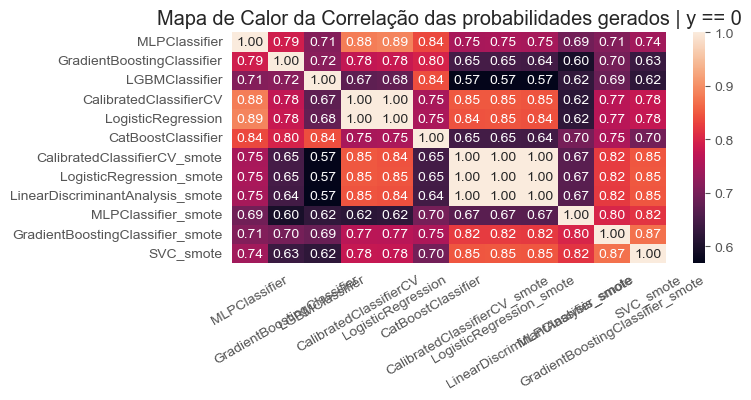

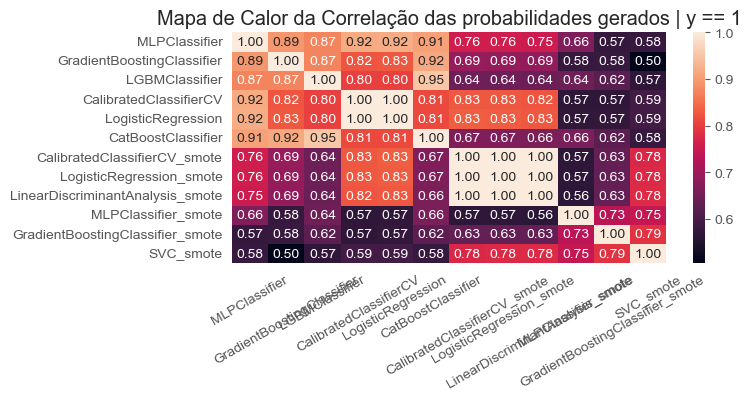

In [28]:
plt.figure(figsize=(7, 3))
sns.heatmap(correlacao_modelos_y0, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades gerados | y == 0')
plt.show()
####################################################################################
plt.figure(figsize=(7, 3))
sns.heatmap(correlacao_modelos_y1, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades gerados | y == 1')
plt.show()

# ================================================================

# Analise F-Beta das Diferenças

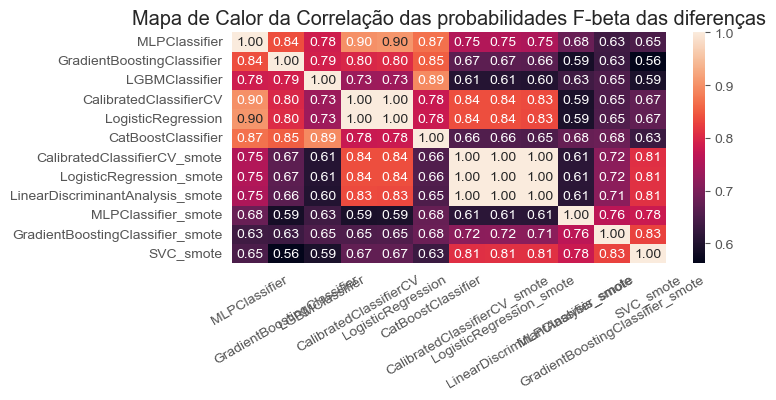

In [29]:
beta = 1#.5

delta_y1 = (1 - correlacao_modelos_y1)
#display(delta_y1.round(2))
delta_y0 = (1 - correlacao_modelos_y0)
#display(delta_y0.round(2))

# F-beta Score
denom_fb_score = (beta**2 * correlacao_modelos_y0) + correlacao_modelos_y1
escore_beta = (1 + beta**2) * (correlacao_modelos_y0 * correlacao_modelos_y1) / denom_fb_score
#############################################################################################

plt.figure(figsize=(7, 3))
sns.heatmap(escore_beta, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades F-beta das diferenças')
plt.show()

# ================================================================

# Analisando combinações de thresholds

In [30]:
from itertools import combinations

# Gerando todas as combinações de 3 itens
combinacoes_modelos = list(combinations(lista_modelos, 3))
combinacoes_modelos

[('MLPClassifier', 'GradientBoostingClassifier', 'LGBMClassifier'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'CalibratedClassifierCV'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'LogisticRegression'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'CatBoostClassifier'),
 ('MLPClassifier',
  'GradientBoostingClassifier',
  'CalibratedClassifierCV_smote'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'LogisticRegression_smote'),
 ('MLPClassifier',
  'GradientBoostingClassifier',
  'LinearDiscriminantAnalysis_smote'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'MLPClassifier_smote'),
 ('MLPClassifier',
  'GradientBoostingClassifier',
  'GradientBoostingClassifier_smote'),
 ('MLPClassifier', 'GradientBoostingClassifier', 'SVC_smote'),
 ('MLPClassifier', 'LGBMClassifier', 'CalibratedClassifierCV'),
 ('MLPClassifier', 'LGBMClassifier', 'LogisticRegression'),
 ('MLPClassifier', 'LGBMClassifier', 'CatBoostClassifier'),
 ('MLPClassifier', 'LGBMClassifier', 'Calibrated

In [31]:
len(combinacoes_modelos)

220

In [32]:
grade_thresholds = pd.DataFrame()

for i in range(len(combinacoes_modelos)):
    print('combinacao n:', i)

    lista = list(combinacoes_modelos[i])
    nome_combinacao = "\n".join(lista)

    modelos_escolhidos = lista
    modelos_escolhidos.append('y')

    fd_previsoes = previsoes[modelos_escolhidos]

    grade_thresholds_temp = gridsearch_mult_models_threshold(fd_previsoes, beta=1.5, linspace_thresholds = list(range(0, 95, 10)) )
    grade_thresholds_temp['nome_comp'] = nome_combinacao
    grade_thresholds_temp['m1'] = lista[0]
    grade_thresholds_temp['m2'] = lista[1]
    grade_thresholds_temp['m3'] = lista[2]

    grade_thresholds = pd.concat([grade_thresholds, grade_thresholds_temp])

grade_thresholds = grade_thresholds.round(2)
grade_thresholds_bck = grade_thresholds
print('finish')

combinacao n: 0
combinacao n: 1
combinacao n: 2
combinacao n: 3
combinacao n: 4
combinacao n: 5
combinacao n: 6
combinacao n: 7
combinacao n: 8
combinacao n: 9
combinacao n: 10
combinacao n: 11
combinacao n: 12
combinacao n: 13
combinacao n: 14
combinacao n: 15
combinacao n: 16
combinacao n: 17
combinacao n: 18
combinacao n: 19
combinacao n: 20
combinacao n: 21
combinacao n: 22
combinacao n: 23
combinacao n: 24
combinacao n: 25
combinacao n: 26
combinacao n: 27
combinacao n: 28
combinacao n: 29
combinacao n: 30
combinacao n: 31
combinacao n: 32
combinacao n: 33
combinacao n: 34
combinacao n: 35
combinacao n: 36
combinacao n: 37
combinacao n: 38
combinacao n: 39
combinacao n: 40
combinacao n: 41
combinacao n: 42
combinacao n: 43
combinacao n: 44
combinacao n: 45
combinacao n: 46
combinacao n: 47
combinacao n: 48
combinacao n: 49
combinacao n: 50
combinacao n: 51
combinacao n: 52
combinacao n: 53
combinacao n: 54
combinacao n: 55
combinacao n: 56
combinacao n: 57
combinacao n: 58
combina

In [33]:
grade_thresholds.shape

(220000, 26)

colunas = ['precisao', 'sensibilidade', 'f1', 'fb_score']
fig = px.box(grade_thresholds, y=colunas, color = 'nome_comp')
fig.show()

In [34]:
colunas_uteis = ['nome_comp', 'threshold', 
                 'tn', 'fp', 'fn', 'tp', 
                 'precisao', 'sensibilidade', 
                 'f1', 'fb_score',
                 0, 1, 2,
                 'm1','m2','m3'
                 ]
grade_thresholds = grade_thresholds[colunas_uteis]
grade_thresholds = grade_thresholds.sort_values('fb_score', ascending=False)
grade_thresholds = grade_thresholds.head(30)
grade_thresholds = grade_thresholds.reset_index()

custo_fp = 2.5
custo_fn = 20.0
grade_thresholds['custo_total'] = fd['fp']*custo_fp + fd['fn']*custo_fn

grade_thresholds

,index,nome_comp,threshold,tn,fp,fn,tp,precisao,sensibilidade,f1,fb_score,0,1,2,m1,m2,m3,custo_total
0,220,MLPClassifier\nLGBMClassifier\nSVC_smote,"(20, 20, 0)",1643,97,47,88,0.48,0.65,0.55,0.59,20,20,0,MLPClassifier,LGBMClassifier,SVC_smote,2700.0
1,222,MLPClassifier\nLGBMClassifier\nCalibratedClass...,"(20, 20, 20)",1644,96,47,88,0.48,0.65,0.55,0.59,20,20,20,MLPClassifier,LGBMClassifier,CalibratedClassifierCV_smote,2700.0
2,221,MLPClassifier\nLGBMClassifier\nGradientBoostin...,"(20, 20, 10)",1643,97,47,88,0.48,0.65,0.55,0.59,20,20,10,MLPClassifier,LGBMClassifier,GradientBoostingClassifier_smote,2700.0
3,222,MLPClassifier\nLGBMClassifier\nLinearDiscrimin...,"(20, 20, 20)",1644,96,47,88,0.48,0.65,0.55,0.59,20,20,20,MLPClassifier,LGBMClassifier,LinearDiscriminantAnalysis_smote,2700.0
4,220,MLPClassifier\nLGBMClassifier\nGradientBoostin...,"(20, 20, 0)",1643,97,47,88,0.48,0.65,0.55,0.59,20,20,0,MLPClassifier,LGBMClassifier,GradientBoostingClassifier_smote,2700.0
5,220,MLPClassifier\nLGBMClassifier\nLinearDiscrimin...,"(20, 20, 0)",1643,97,47,88,0.48,0.65,0.55,0.59,20,20,0,MLPClassifier,LGBMClassifier,LinearDiscriminantAnalysis_smote,2700.0
6,202,MLPClassifier\nGradientBoostingClassifier\nLGB...,"(20, 0, 20)",1643,97,47,88,0.48,0.65,0.55,0.59,20,0,20,MLPClassifier,GradientBoostingClassifier,LGBMClassifier,2700.0
7,220,MLPClassifier\nLGBMClassifier\nCalibratedClass...,"(20, 20, 0)",1643,97,47,88,0.48,0.65,0.55,0.59,20,20,0,MLPClassifier,LGBMClassifier,CalibratedClassifierCV,2700.0
8,221,MLPClassifier\nLGBMClassifier\nCalibratedClass...,"(20, 20, 10)",1643,97,47,88,0.48,0.65,0.55,0.59,20,20,10,MLPClassifier,LGBMClassifier,CalibratedClassifierCV_smote,2700.0
9,220,MLPClassifier\nLGBMClassifier\nCalibratedClass...,"(20, 20, 0)",1643,97,47,88,0.48,0.65,0.55,0.59,20,20,0,MLPClassifier,LGBMClassifier,CalibratedClassifierCV_smote,2700.0


In [35]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        dimensions = list([
            dict(range = [0, 1], label = 'precisao', values = grade_thresholds['precisao']),
            dict(range = [0, 1], label = 'sensibilidade', values = grade_thresholds['sensibilidade']),
            dict(range = [0, 1], label = 'f1', values = grade_thresholds['f1']),
            dict(range = [0, 1], label = 'fb_score', values = grade_thresholds['fb_score'])
        ])
    )
)

fig.show()

# avaliando como o modelo trabalha

In [36]:
#for linha in range(len(grade_thresholds)):
linha = grade_thresholds.index[1]
m1, m2, m3 = grade_thresholds['m1'][linha], grade_thresholds['m2'][linha], grade_thresholds['m3'][linha]
############print(m1, m2, m3)

####################################################################################
corte1, corte2, corte3 = grade_thresholds[0][linha], grade_thresholds[1][linha], grade_thresholds[2][linha]
############print(corte1, corte2, corte3)

####################################################################################
previsoes_filter0 = previsoes[['y', m1, m2, m3]]
previsoes_filter = previsoes_filter0
############previsoes_filter.sample(5)

####################################################################################
previsoes_filter['m1_bin'] = np.where(previsoes_filter[m1] > corte1, 1, 0)
previsoes_filter['m2_bin'] = np.where(previsoes_filter[m2] > corte2, 1, 0)
previsoes_filter['m3_bin'] = np.where(previsoes_filter[m3] > corte3, 1, 0)

previsoes_filter['decisao_final'] = previsoes_filter['m1_bin'] + previsoes_filter['m2_bin'] + previsoes_filter['m3_bin']
previsoes_filter['decisao_final'] = np.where(previsoes_filter['decisao_final'] >= 2, 1, 0)
############previsoes_filter.sample(5)

####################################################################################
colunas_avaliadas = ['m1_bin','m2_bin','m3_bin','decisao_final','y']
previsoes_filter = previsoes_filter#[previsoes_filter['y'] == 1].reset_index(drop=True)
fig = px.parallel_categories(previsoes_filter[colunas_avaliadas], 
                            color='decisao_final', 
                            color_continuous_scale=px.colors.diverging.Tealrose,
                            color_continuous_midpoint=0.5)
fig.update_layout(title=grade_thresholds['nome_comp'][linha])
fig.show()

####################################################################################
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = previsoes_filter0['y'],
                   colorscale = [[0,'grey'], [1,'red']]),
        dimensions = list([
            dict(range = [0, 100],
                label = m1, values = previsoes_filter0[m1]),
            dict(range = [0, 100],
                label = m2, values = previsoes_filter0[m2]),
            dict(range = [0, 100],
                label = m3, values = previsoes_filter0[m3]),
            dict(range = [0, 1],
                #constraintrange = [0.5,1],
                label = 'y', values = previsoes_filter0['y'])
        ])
    )
)
fig.show()
####################################################################################


In [37]:
print(corte1, corte2, corte3)

20 20 20


# Criando Pós Roc

In [38]:
print(m1, m2, m3)

MLPClassifier LGBMClassifier CalibratedClassifierCV_smote


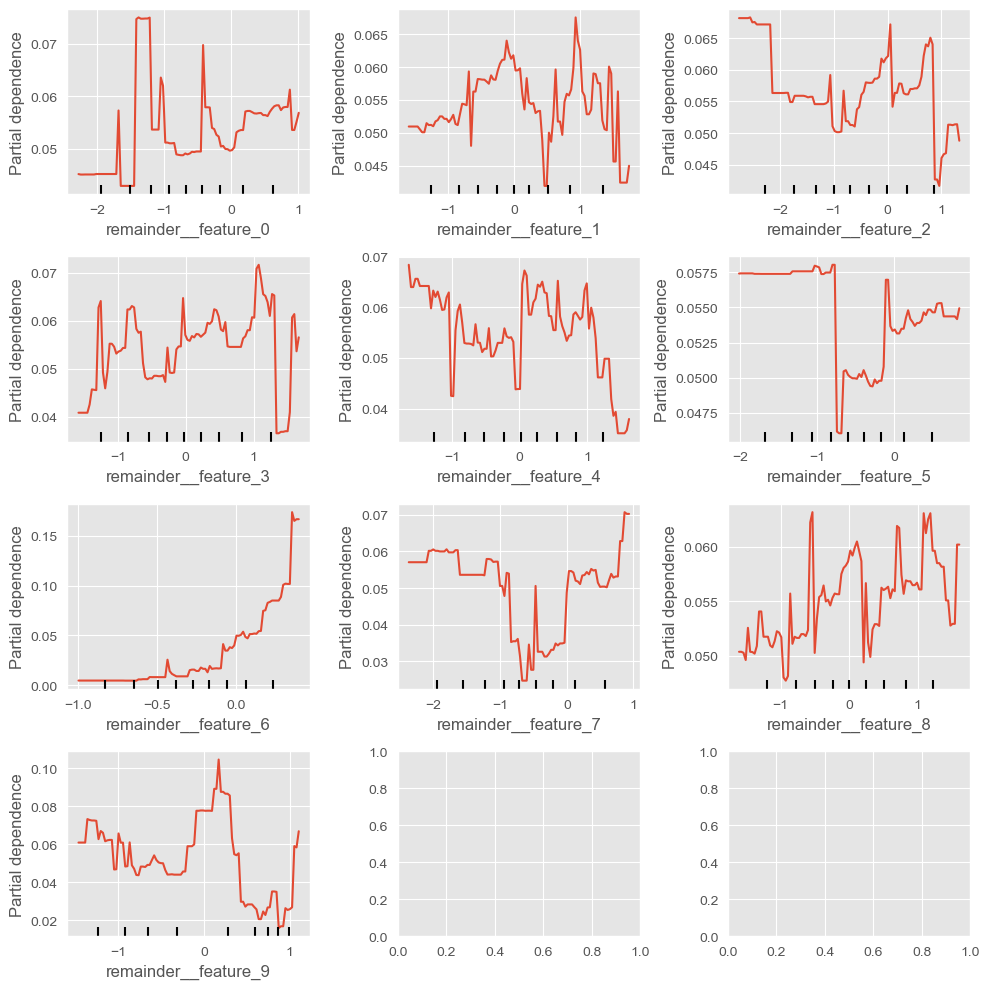

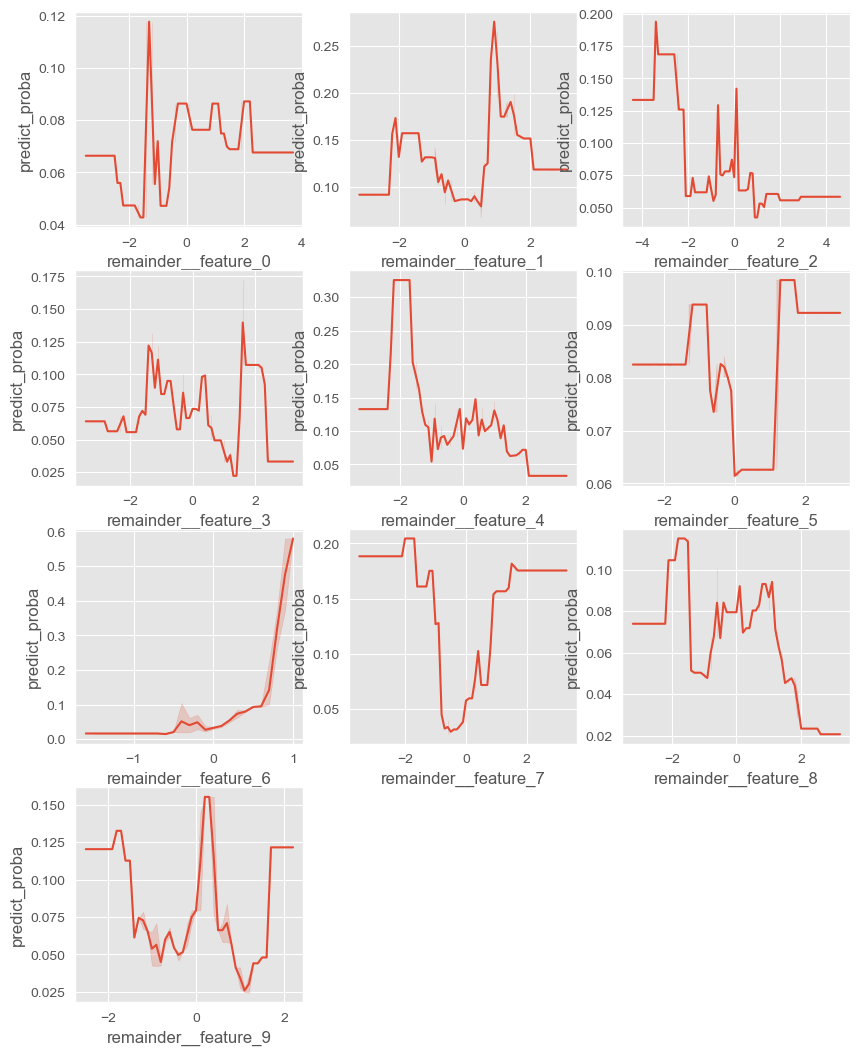

In [39]:
modelo_m1 = model_dict['LGBMClassifier']
coluna_analisada = 'remainder__' + 'feature_4'

x_data = pd.DataFrame(x_teste.values, columns=novos_nomes_colunas, index=x_teste.index)

contribuicao_proba2(x_data, modelo_m1)

plt.figure(figsize=(10, 33))
contribuicao_proba(x_data, modelo_m1, sep=100)